<a href="https://colab.research.google.com/github/krishnamittal01/data-science/blob/main/Diabates_Prediction_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_diabetes

In [10]:
df=load_diabetes()

In [7]:
##independent features

X=pd.DataFrame(load_diabetes().data,columns=['age','sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [11]:
y=df['target']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)



In [15]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

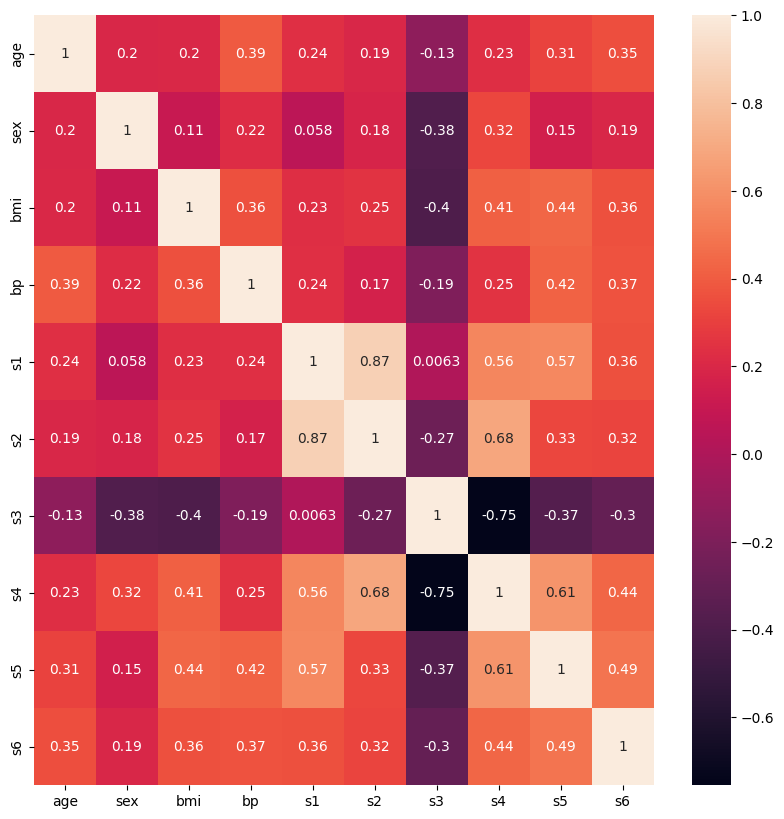

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
y_pred=dt.predict(X_test)

In [20]:
## To avoid the overfitting we are going to do a Hyper Parameter Tunning


from sklearn.model_selection import GridSearchCV
param={
    'criterion':['sqarred_error','absolute_error','poisson'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2'],
    'splitter':['best','random']
}




In [21]:
grid=GridSearchCV(dt,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [22]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['sqarred_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [23]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='log2')

In [24]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [26]:
y_pred=grid.predict(X_test)

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.3050365379671147
52.46565199974508
66.31365026001833


In [31]:
model=DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='log2', splitter='best')

In [32]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='log2')

[Text(0.5, 0.875, 'x[8] <= -0.004\npoisson = 18.919\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.625, 'x[6] <= 0.025\npoisson = 12.271\nsamples = 145\nvalue = 109.779'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 0.003\npoisson = 13.723\nsamples = 91\nvalue = 122.341'),
 Text(0.0625, 0.125, 'poisson = 14.391\nsamples = 47\nvalue = 134.809'),
 Text(0.1875, 0.125, 'poisson = 11.6\nsamples = 44\nvalue = 109.023'),
 Text(0.375, 0.375, 'x[2] <= -0.063\npoisson = 6.47\nsamples = 54\nvalue = 88.611'),
 Text(0.3125, 0.125, 'poisson = 2.322\nsamples = 12\nvalue = 66.75'),
 Text(0.4375, 0.125, 'poisson = 6.597\nsamples = 42\nvalue = 94.857'),
 Text(0.75, 0.625, 'x[9] <= 0.034\npoisson = 14.497\nsamples = 164\nvalue = 190.72'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= -0.006\npoisson = 13.01\nsamples = 106\nvalue = 170.877'),
 Text(0.5625, 0.125, 'poisson = 11.995\nsamples = 18\nvalue = 138.222'),
 Text(0.6875, 0.125, 'poisson = 12.406\nsamples = 88\nvalue =

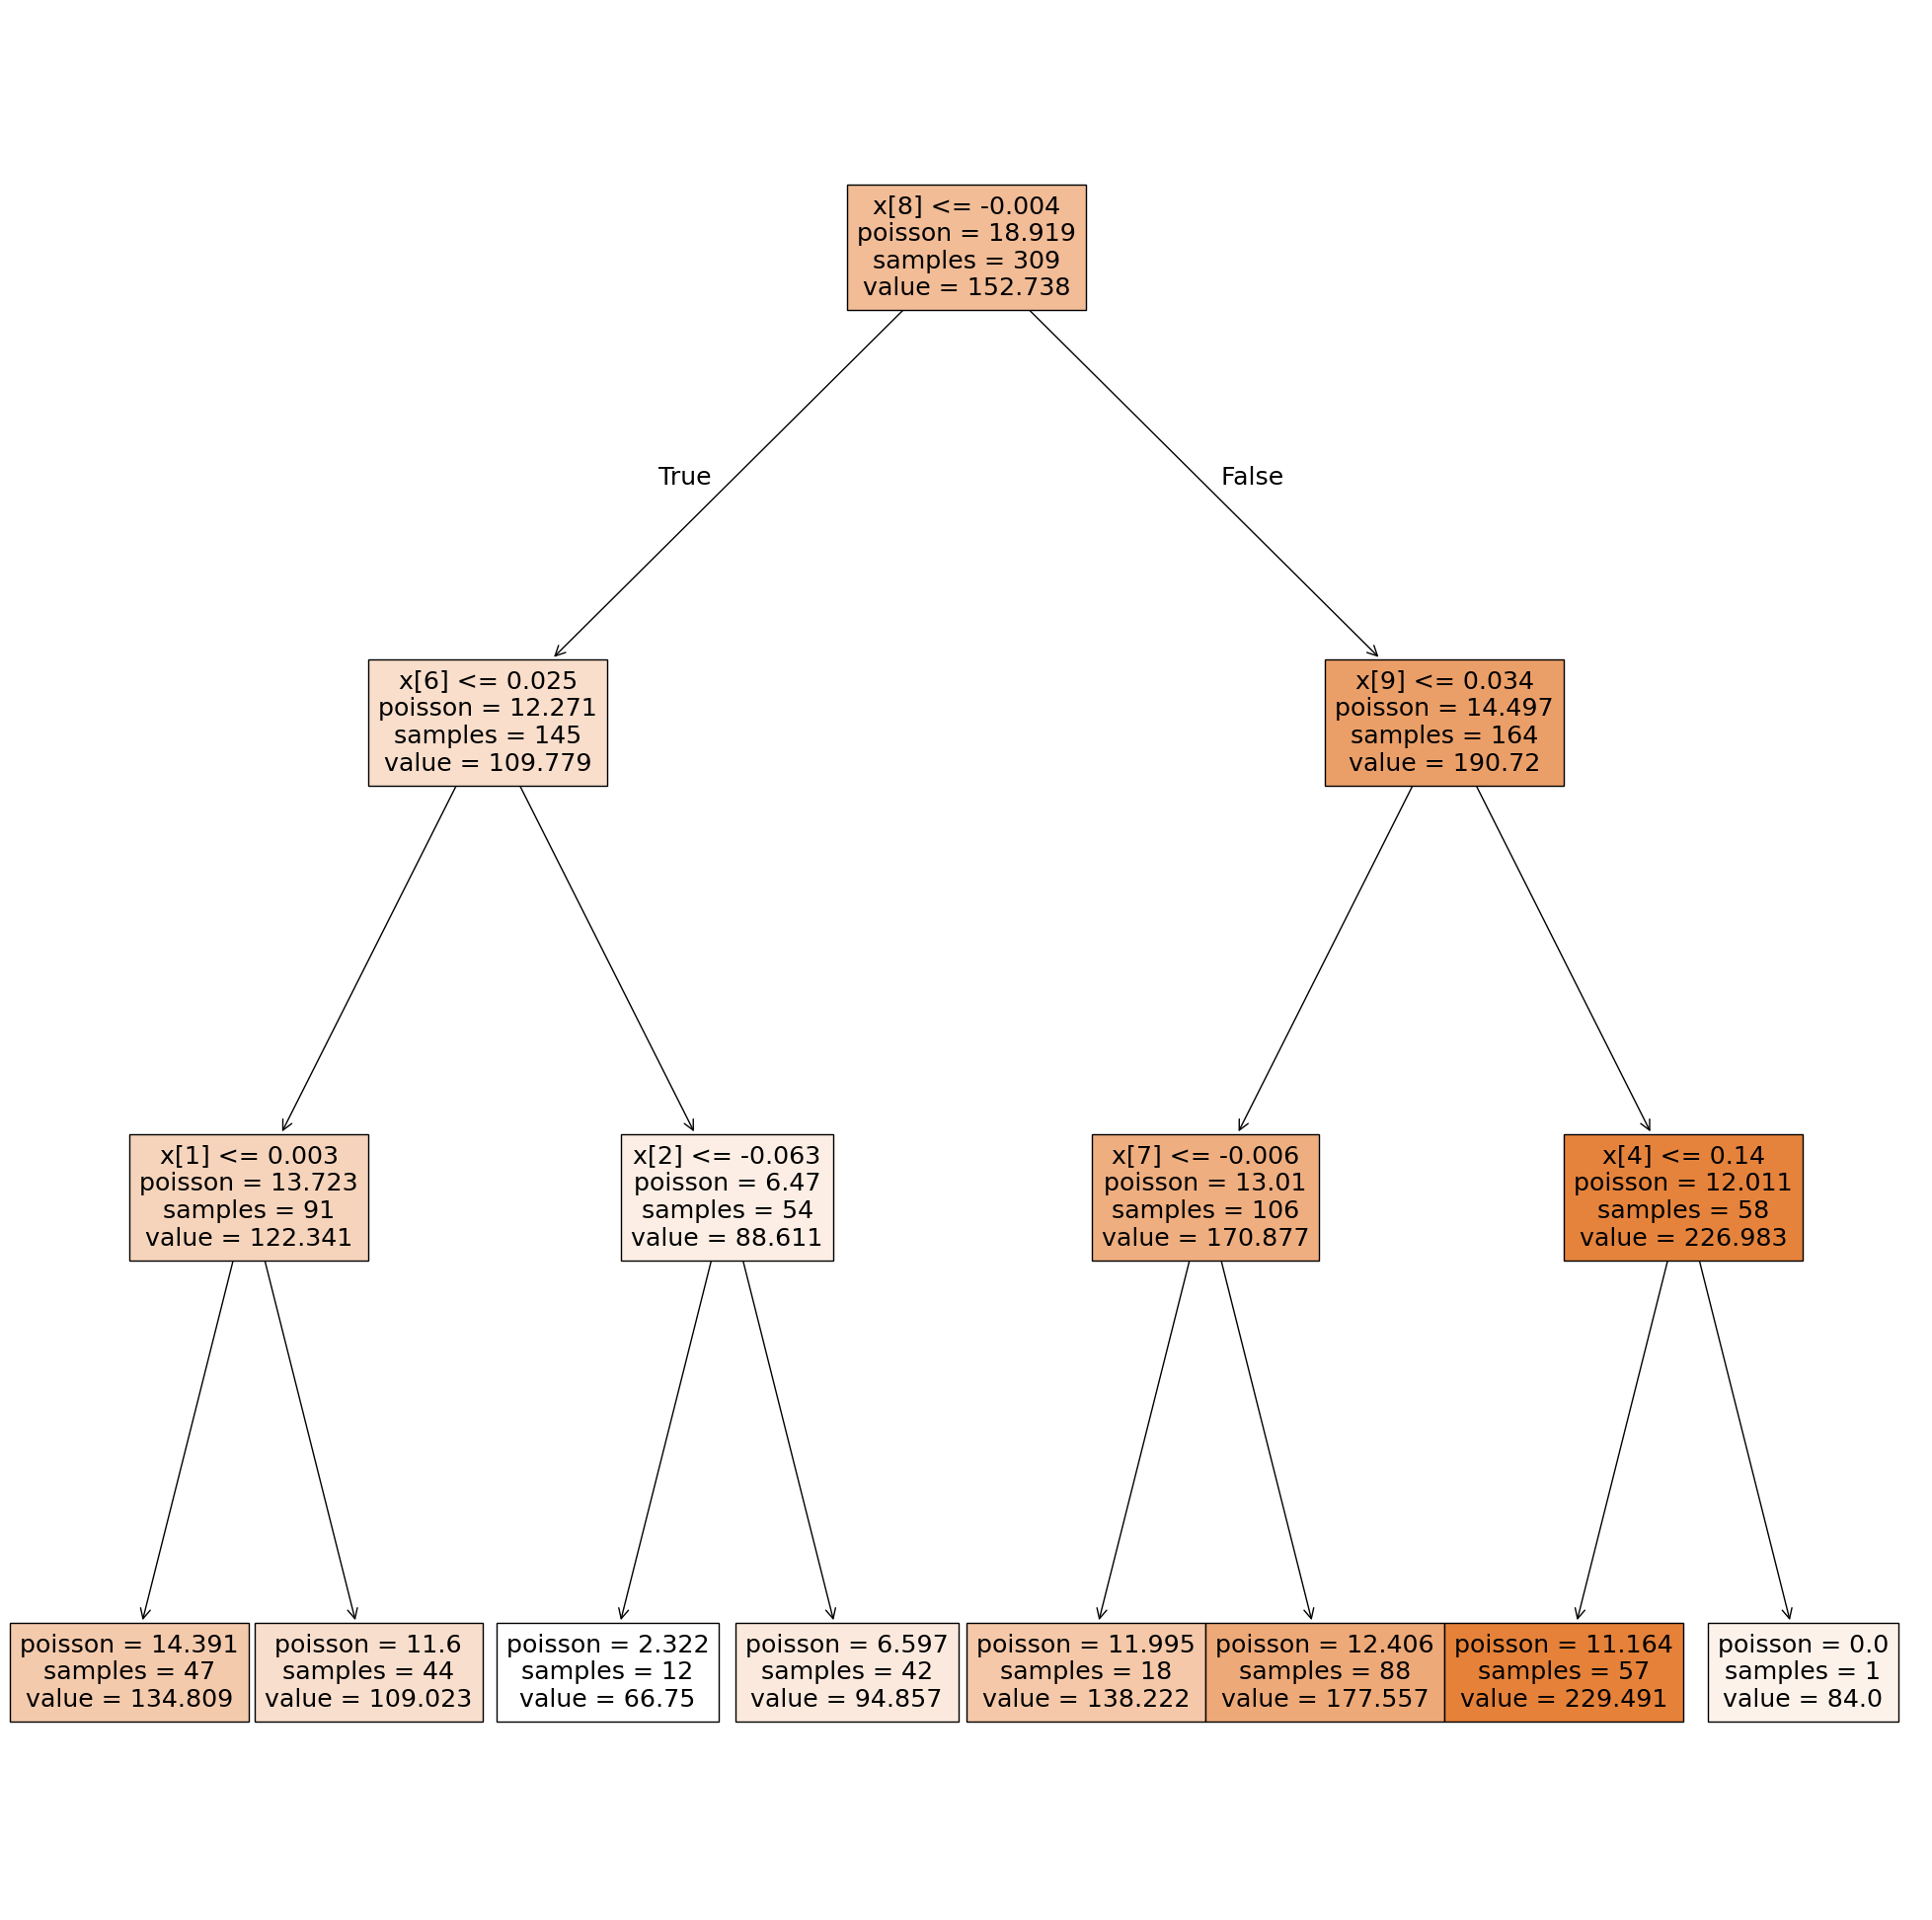

In [33]:

from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(model,filled=True)